In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error
import shap

In [2]:
df = pd.read_excel("HH_Input.xlsx")
df = df.drop('Unnamed: 0', axis = 1)
df

,Target,n-1,n-2,n-3,n-4,n-5,dayofweek,hour,holiday,month,Temperature (C),Feels like (C),Humidity (%)
0,12.60,12.80,11.90,13.50,12.30,12.80,0,0,1,1,6.1,2.0,84.33
1,11.90,12.60,12.80,11.90,13.50,12.30,0,0,1,1,6.0,1.6,80.44
2,13.00,11.90,12.60,12.80,11.90,13.50,0,0,1,1,6.0,1.6,80.44
3,11.91,13.00,11.90,12.60,12.80,11.90,0,0,1,1,5.8,1.7,82.54
4,11.90,11.91,13.00,11.90,12.60,12.80,0,0,1,1,5.8,1.7,82.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35030,13.56,15.12,15.00,14.56,15.00,15.31,1,0,0,12,6.5,3.3,88.23
35031,13.81,13.56,15.12,15.00,14.56,15.00,1,0,0,12,6.6,4.4,87.69
35032,14.12,13.81,13.56,15.12,15.00,14.56,1,0,0,12,6.6,4.4,87.69
35033,14.50,14.12,13.81,13.56,15.12,15.00,1,0,0,12,6.7,4.1,88.13


In [23]:
feature_cols = ['n-1', 'n-2', 'n-3', 'n-4', 'n-5', 'dayofweek', 'hour', 'month', 'holiday', 'Temperature (C)', 'Feels like (C)', 'Humidity (%)']

X = df[feature_cols] # Features
y = df.Target # Target variable

scaler = StandardScaler() #scaling
X_scaled = scaler.fit_transform(X)


from sklearn.model_selection import train_test_split

#X1,X_Validate,y1,y_validate = train_test_split(X,y,test_size=0.2,random_state=42) #split training:testing:validation 60:20:20
X_train,X_test,y_train,y_test = train_test_split(X1,y1,test_size=0.25,random_state=42) #split training:testing 75:25

# Random Forest Regressor

In [60]:
estimator = RandomForestRegressor(n_estimators = 700,  random_state=42).fit(X_train, y_train)
y_pred = estimator.predict(X_test)

RandomForestMAPE = mean_absolute_percentage_error(y_test, y_pred) * 100
RandomForestMAPE







4.047690686550952

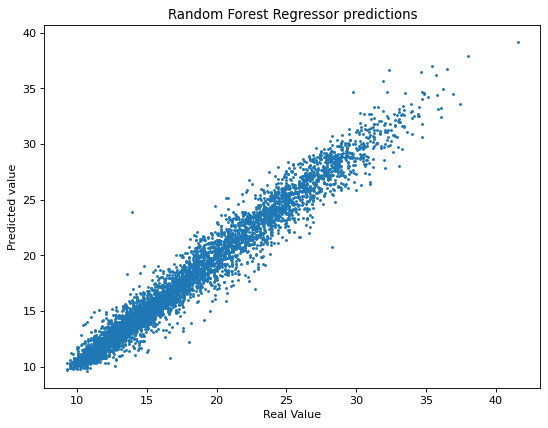

In [35]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.scatter(y_test,y_pred, s = 2.5)
plt.xlabel('Real Value')
# Set the y axis label of the current axis.
plt.ylabel('Predicted value')
# Set a title of the current axes.
plt.title('Random Forest Regressor predictions')
# Display a figure.
plt.show()

# KNN

In [29]:
estimator = KNeighborsRegressor(n_neighbors = 16,  weights = 'distance').fit(X_train, y_train)
y_pred2 = estimator.predict(X_test)

KNNMAPE = mean_absolute_percentage_error(y_test, y_pred2) * 100
KNNMAPE





4.811476488340717

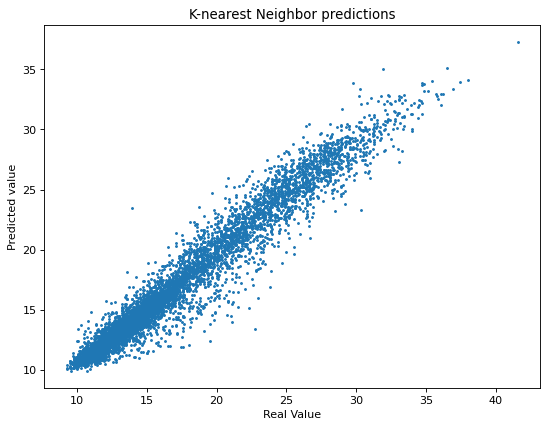

In [36]:
figure(figsize=(8, 6), dpi=80)
plt.scatter(y_test,y_pred2, s = 2.5)
plt.xlabel('Real Value')
# Set the y axis label of the current axis.
plt.ylabel('Predicted value')
# Set a title of the current axes.
plt.title('K-nearest Neighbor predictions')
# Display a figure.
plt.show()

# SVM Regression

In [37]:
estimator = svm.SVR(C = 1,  kernel = 'linear', epsilon = 1).fit(X_train, y_train)
y_pred3 = estimator.predict(X_test)

SVMMAPE = mean_absolute_percentage_error(y_test, y_pred3) * 100
SVMMAPE



4.304762215807404

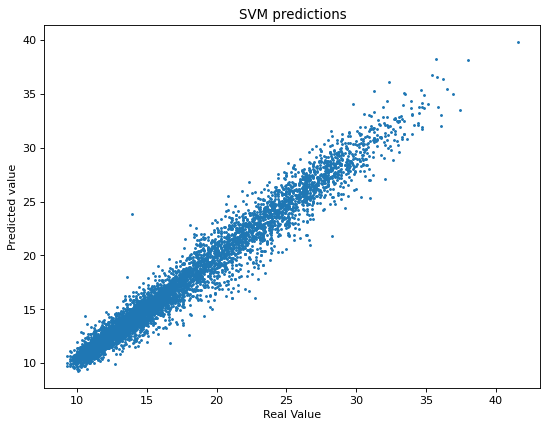

In [40]:
figure(figsize=(8, 6), dpi=80)
plt.scatter(y_test,y_pred3, s = 2.5)
plt.xlabel('Real Value')
# Set the y axis label of the current axis.
plt.ylabel('Predicted value')
# Set a title of the current axes.
plt.title('SVM predictions')
# Display a figure.
plt.show()



# Linear Regression

4.284738916483795


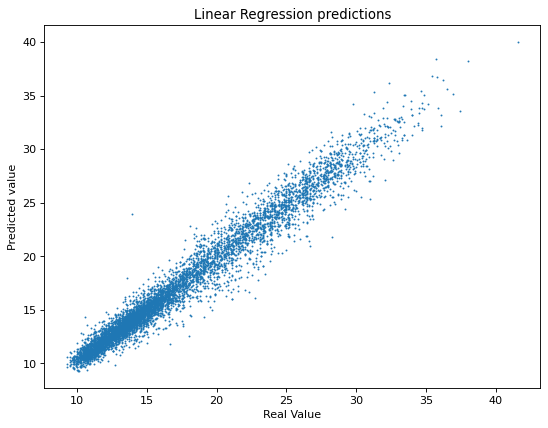

In [62]:
from sklearn.linear_model import LinearRegression

estimator = LinearRegression().fit(X_train, y_train)
y_pred4 = estimator.predict(X_test)

LinearRegMAPE = mean_absolute_percentage_error(y_test, y_pred4) * 100
print(LinearRegMAPE)

figure(figsize=(8, 6), dpi=80)
plt.scatter(y_test,y_pred4, s = 0.5)
plt.xlabel('Real Value')
# Set the y axis label of the current axis.
plt.ylabel('Predicted value')
# Set a title of the current axes.
plt.title('Linear Regression predictions')
# Display a figure.
plt.show()

4.284980971843626


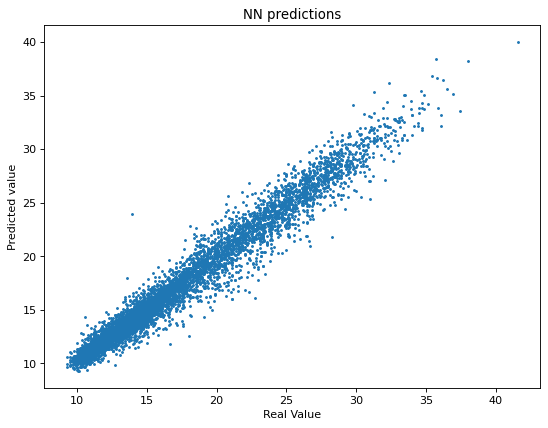

In [52]:
from sklearn.neural_network import MLPRegressor

estimator = MLPRegressor(hidden_layer_sizes = 13, solver = 'lbfgs', learning_rate_init = 0.1, max_iter=3000).fit(X_train, y_train)
y_pred5 = estimator.predict(X_test)

MLPMAPE = mean_absolute_percentage_error(y_test, y_pred5) * 100
print(MLPMAPE)

figure(figsize=(8, 6), dpi=80)
plt.scatter(y_test,y_pred5, s = 2.5)
plt.xlabel('Real Value')
# Set the y axis label of the current axis.
plt.ylabel('Predicted value')
# Set a title of the current axes.
plt.title('NN predictions')
# Display a figure.
plt.show()

In [56]:
shap.initjs()

In [61]:
X_importance = X_test

# Explain model predictions using shap library:
explainer = shap.TreeExplainer(estimator)
shap_values = explainer.shap_values(X_importance)




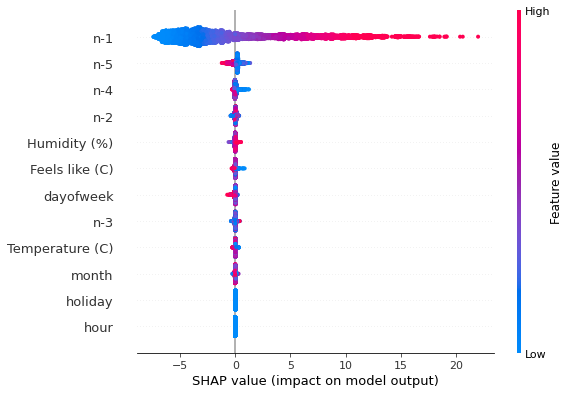

In [63]:
shap.summary_plot(shap_values, X_importance)

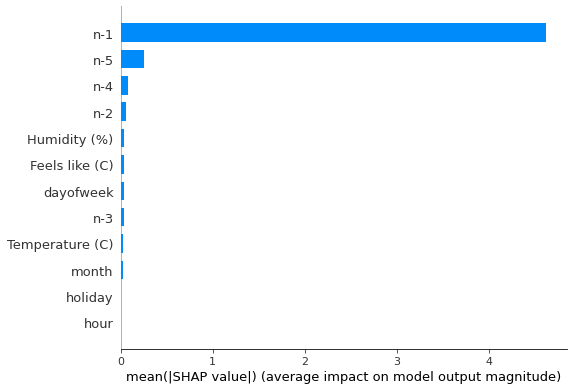

In [64]:
shap.summary_plot(shap_values, X_importance, plot_type='bar')